In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
class Xperiment(object):
    
    N_PPL = 100
    N_DOLLARS = 100
    N_TICKS = 5000
    
    def __init__(self, how=1):
        self.balances = [self.N_DOLLARS] * self.N_PPL
        self.how = how
    
    def settle_tick(self, gives_to):
        for from_, to_ in enumerate(gives_to):
            if to_ is None:
                continue
            elif self.how == 1:
                self.balances[from_] -= 1
                self.balances[to_] += 1
            else:
                amount = self.how * self.balances[from_]
                self.balances[from_] -= amount
                self.balances[to_] += amount
    
    def tick(self, give_to_self=True):
        gives_to = []
        for person, balance in enumerate(self.balances):
            if balance == 0:
                gives_to.append(None)
            elif give_to_self:
                gives_to.append(np.random.choice(self.N_PPL))
            else:
                to_0 = np.random.choice(self.N_PPL - 1)
                to_0 += to_0 >= person
                gives_to.append(to_0)
        else:
            self.settle_tick(gives_to)
        self.mins = pd.Series(map(min, zip(self.mins, self.balances)))
        self.maxs = pd.Series(map(max, zip(self.maxs, self.balances)))
    
    def run(self, give_to_self=False, balances=None):
        self.balances = list(balances) if balances is not None else [self.N_DOLLARS] * self.N_PPL
        self.mins = pd.Series(self.balances, index=range(self.N_PPL))
        self.maxs = self.mins.copy()
        for i in range(self.N_TICKS):
            self.tick(give_to_self=give_to_self)
            
    def run_exp_series(self, n_mc, **kwargs):
        bals = pd.Series(0, index=range(self.N_PPL))
        for i in range(n_mc):
            self.run(**kwargs)
            bals += self.balances
        else:
            bals /= n_mc
        return bals
    
    def plot(self, sort=True):
        if sort:
            plotthis = pd.DataFrame()
            plotthis['y'] = pd.Series(self.balances)
            plotthis['mins'] = self.mins.copy()
            plotthis['maxs'] = self.maxs.copy()
            plotthis.sort_values(by='y', inplace=True)
            ax = plotthis['y'].plot(kind='bar', figsize=(20, 5))
            plotthis['mins'].plot(kind='bar', ax=ax, color='r', alpha=.8)
            plotthis['maxs'].plot(kind='bar', ax=ax, color='g', alpha=.2)
        else:
            ax = pd.Series(self.balances).plot(kind='bar', figsize=(20, 5))
            self.mins.plot(kind='bar', ax=ax, color='r', alpha=.2)
            self.maxs.plot(kind='bar', ax=ax, color='g', alpha=.2)
        title = 'SITUATION AFTER {} TICKS'.format(self.N_TICKS)
        if sort:
            title += ' - SORTED'
        ax.set(title=title)
    
    def plot_2(self, y, sort=False, title=''):
        if sort:
            y = pd.Series(sorted(y))
        else:
            y = pd.Series(y)    
        ax = y.plot(kind='bar', figsize=(20, 5))
        if sort:
            title += ' - SORTED'
        ax.set(title=title)

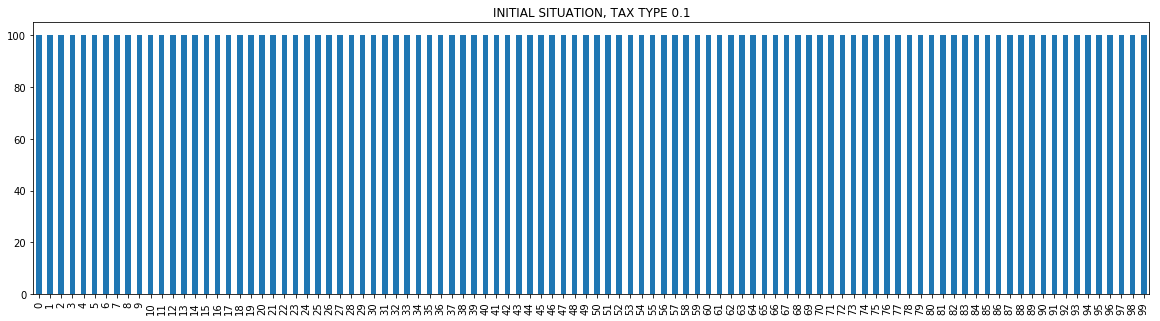

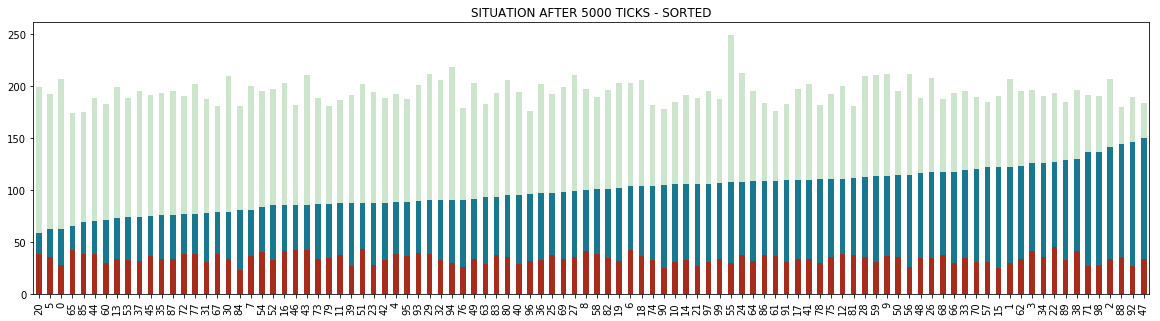

In [40]:
tax_type = .1
x = Xperiment(how=tax_type)
balances = tuple(100 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION, TAX TYPE {}'.format(tax_type))
plt.show()
x.run()
x.plot(sort=True)

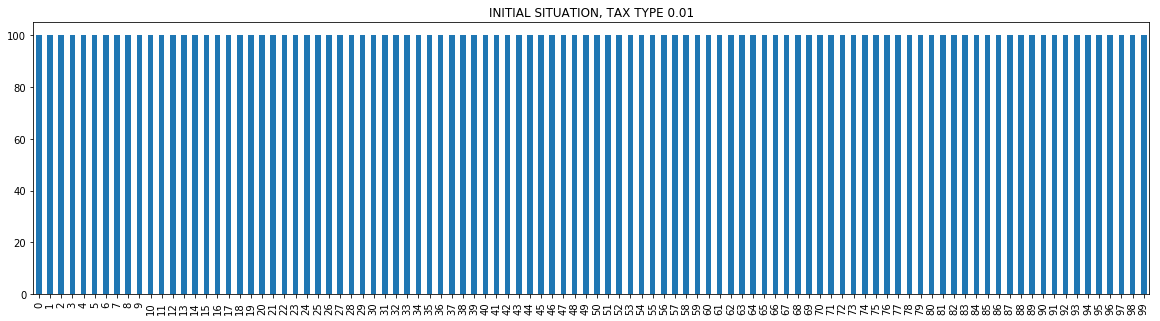

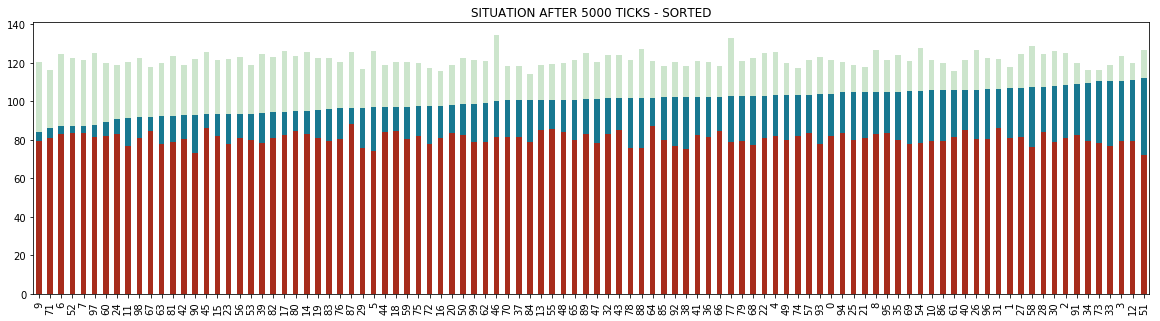

In [4]:
tax_type = .01
x = Xperiment(how=tax_type)
balances = tuple(100 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION, TAX TYPE {}'.format(tax_type))
plt.show()
x.run()
x.plot(sort=True)

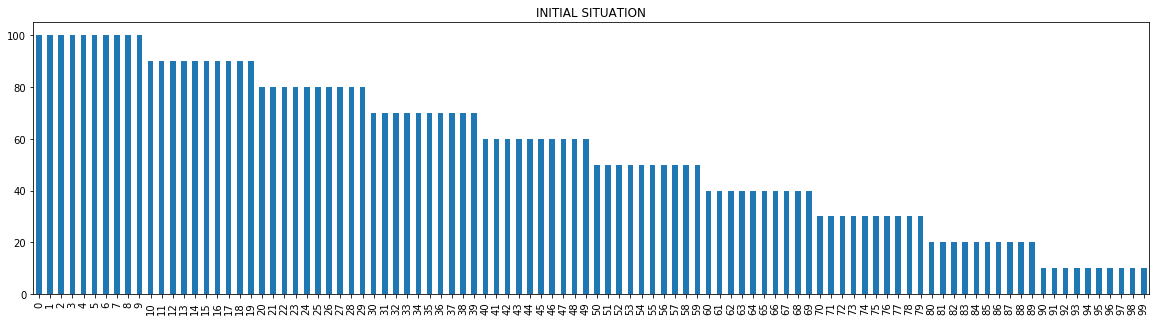

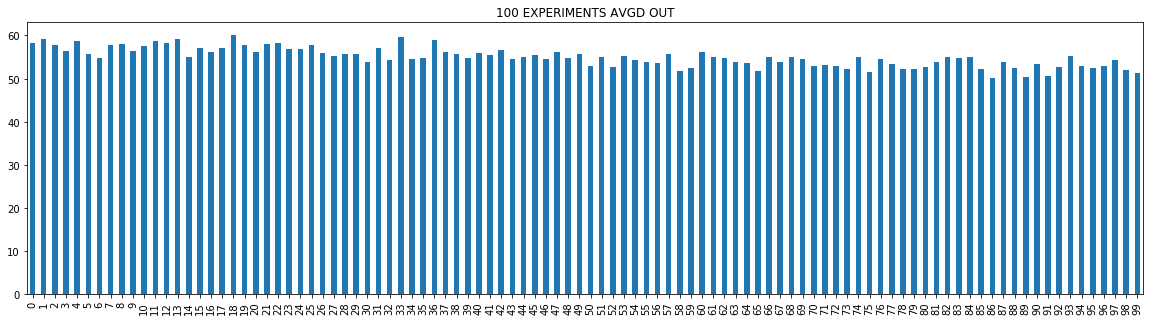

In [4]:
x = Xperiment(how=.1)
balances = tuple(100 - i // 10 * 10 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 100
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())

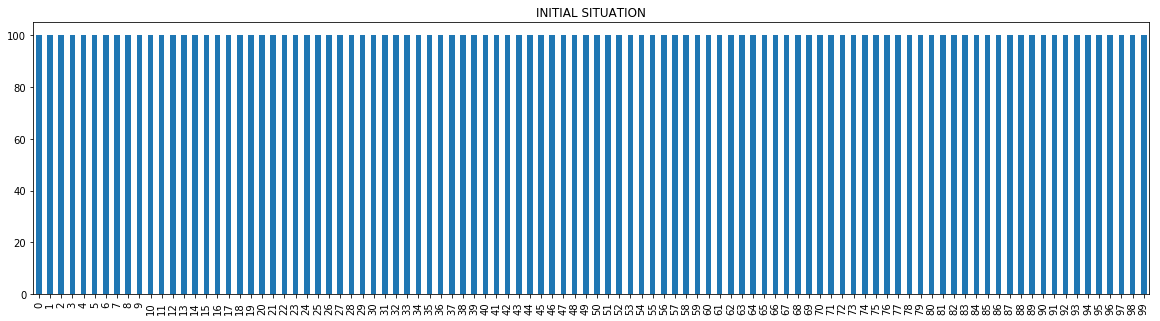

KeyboardInterrupt: 

In [13]:
x = Xperiment(how=.1)
balances = tuple(100 for i in range(100))
ax = pd.Series(balances).plot(kind='bar', figsize=(20, 5))
ax.set(title='INITIAL SITUATION')
plt.show()
n_mc = 100
outcome = x.run_exp_series(n_mc=n_mc, give_to_self=False, balances=balances)
x.plot_2(outcome, title='{} experiments avgd out'.format(n_mc).upper())